In [94]:
## import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import copy
%matplotlib inline


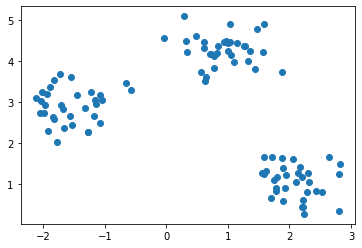

In [95]:
## Initialisation
np.random.seed(7)

X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=0.40, random_state=0)
plt.scatter(X[:,0], X[:,1])
colors = {0:'red', 1:'blue', 2:'green', 3:'orange'}

In [96]:
data = pd.DataFrame(list(zip(X[:,0], X[:,1])), columns =['x', 'y'])
data

,x,y
0,2.285904,0.814344
1,0.618083,4.458548
2,2.434168,0.835660
3,0.330711,4.218691
4,0.556849,3.735780
...,...,...
95,-1.051692,3.044659
96,1.101497,3.962149
97,1.322045,4.006921
98,-1.276811,2.277059


In [97]:
def initialize_centroids(k, data):

    n_dims = data.shape[1]
    centroid_min = data.min().min()
    centroid_max = data.max().max()
    centroids = []

    for centroid in range(k):
        centroid = np.random.uniform(centroid_min, centroid_max, n_dims)
        centroids.append(centroid)

    centroids = pd.DataFrame(centroids, columns = data.columns)

    return centroids

In [98]:
def calculate_squared_errors(a,b):
    error = np.square(np.sum((a-b)**2))

    return error 

In [99]:
def assign_centroid(data, centroids):
    centroid_assign = []
    centroid_errors = []
    k = centroids.shape[0]


    for i in range(data.shape[0]):  

        # Calculate the errror
        errors = np.array([])
        for centroid in range(k):
            error = calculate_squared_errors(centroids.iloc[centroid, :2], data.iloc[i,:2])
            errors = np.append(errors, error)

        # Calculate closest centroid & error 
        closest_centroid =  np.where(errors == np.amin(errors))[0].tolist()[0]
        centroid_error = np.amin(errors)

        # Assign values to lists
        centroid_assign.append(closest_centroid)
        centroid_errors.append(centroid_error)

        

    return (centroid_assign, centroid_errors)

In [102]:
def k_means(data, k):
    # Initialize centroids and error
    centroids = initialize_centroids(k, data)
    error = []
    compr = True
    i = 0


    while(compr):
        # Obtain centroids and error
        data['centroid'], iter_error = assign_centroid(data,centroids)
        error.append(sum(iter_error))

        # print('after iterration:', i)
        # plt.scatter(data.iloc[:,0], data.iloc[:,1],  marker = 'o', c = data['centroid'].apply(lambda x: colors[x]), alpha = 0.5)
        # plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  marker = '*', s=200, 
        #           c = centroids.index.map(lambda x: colors[x]))
        
        # plt.show()

        # Recalculate centroids
        centroids = data.groupby('centroid').agg('mean').reset_index(drop = True)
        
        # Check if the error has decreased
        if(len(error)<2):
            compr = True
        else:
            if(round(error[i],3) !=  round(error[i-1],3)):
                compr = True
            else:
                compr = False
        i = i + 1 
    
    

    data['centroid'], iter_error = assign_centroid(data,centroids)
    centroids = data.groupby('centroid').agg('mean').reset_index(drop = True)
    
    return (data['centroid'], iter_error, centroids)

running start ------  k means ------ no: 0


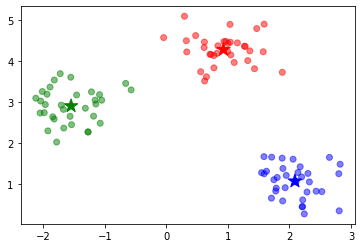

end ------  k means ------ no: 0
running start ------  k means ------ no: 1


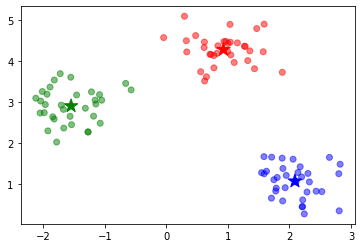

end ------  k means ------ no: 1
running start ------  k means ------ no: 2


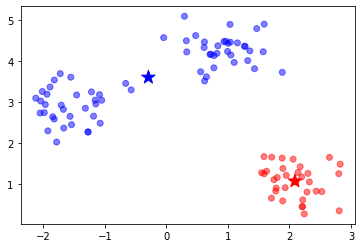

end ------  k means ------ no: 2
running start ------  k means ------ no: 3


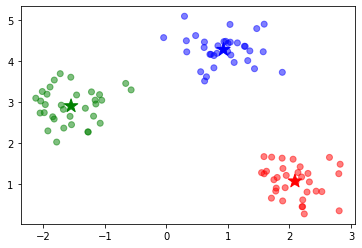

end ------  k means ------ no: 3
running start ------  k means ------ no: 4


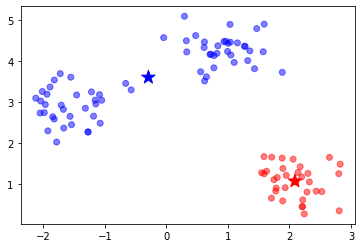

end ------  k means ------ no: 4
running start ------  k means ------ no: 5


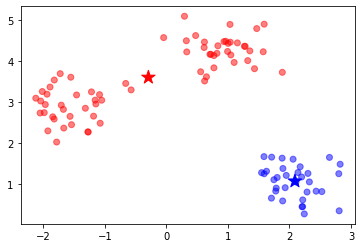

end ------  k means ------ no: 5
running start ------  k means ------ no: 6


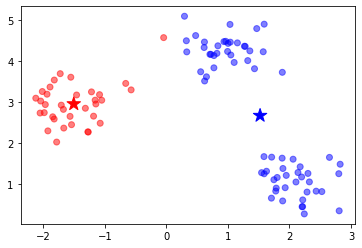

end ------  k means ------ no: 6
running start ------  k means ------ no: 7


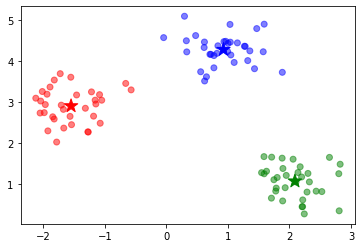

end ------  k means ------ no: 7
running start ------  k means ------ no: 8


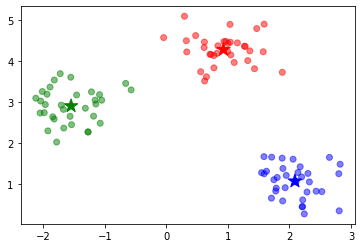

end ------  k means ------ no: 8
running start ------  k means ------ no: 9


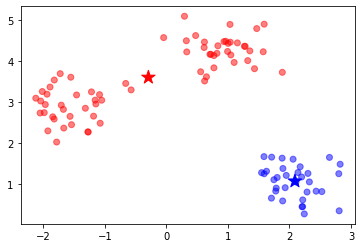

end ------  k means ------ no: 9


[17.266102435423786,
 17.266102435423786,
 453.6587888103371,
 17.266102435423786,
 453.6587888103371,
 453.6587888103371,
 804.0652807345303,
 17.266102435423786,
 17.266102435423786,
 453.6587888103371]

In [103]:
''' 
because the centroids are initialized randomly, data might not be well classified. 
to solve the problem of random initialization of centroids run the k_means several time and where the error is minimum that is the best possible solution
'''
num_trials = 10

classifications = []
errors = []
centroids = []

for i in range(num_trials):
    print('running start ------  k means ------ no:', i)
    np.random.seed(i)
    iter_class, iter_error, iter_centroid = k_means(data,3)  
    classifications.append(copy.deepcopy(iter_class))
    errors.append(sum(iter_error))
    centroids.append(iter_centroid)

    plt.scatter(data.iloc[:,0], data.iloc[:,1],  marker = 'o', c = data['centroid'].apply(lambda x: colors[x]), alpha = 0.5)
    plt.scatter(iter_centroid.iloc[:,0], iter_centroid.iloc[:,1],  marker = '*', s=200, c = iter_centroid.index.map(lambda x: colors[x]))
    plt.show()

    print('end ------  k means ------ no:', i)

errors



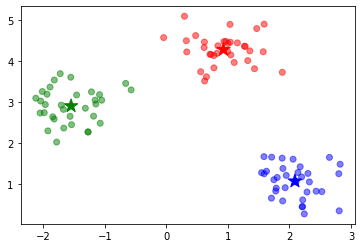

In [104]:
# best solution  

errors = np.array(errors)
best_ind = np.where(errors == errors.min())[0].tolist()[0]

data['centroid'] = classifications[best_ind]

plt.scatter(data.iloc[:,0], data.iloc[:,1],  marker = 'o', c = data['centroid'].apply(lambda x: colors[x]), alpha = 0.5)
plt.scatter(centroids[best_ind].iloc[:,0], centroids[best_ind].iloc[:,1],  marker = '*', s=200, c = centroids[best_ind].index.map(lambda x: colors[x]))